# Loan Approval Prediction
# EDA

In [13]:
import os
import yaml
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
%matplotlib inline

In [14]:
with open("config.yaml") as f:
    cfg = yaml.safe_load(f)

DATA_DIR = Path(cfg["data_dir"]).expanduser()
FILENAME = cfg["filename"]
RANDOM_SEED = cfg["random_seed"]

In [15]:
# load data
df = pd.read_csv(os.path.join(DATA_DIR, FILENAME))

In [16]:
# get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Column description:
- person_age: Age of the applicant (in years).
- person_income: Annual income of the applicant.
- person_home_ownership: Type of home ownership (rent, own, mortgage, other).
- person_emp_length: Length of employment (in years).
- loan_intent: Purpose of the loan (personal, education, medicalventure, homeimprovement, debtconsolidation).
- loan_grade: Credit grade assigned to the loan (grade a to g).
- loan_amnt: Amount of the loan applied for.
- loan_int_rate: Interest rate of the loan.
- loan_status: Target variable; 1 if loan was not paid back, 0 if paid back.
- loan_percent_income: Ratio of loan amount to applicant's income.
- cb_person_default_on_file: Whether the applicant has a default on file with credit bureau (y/n).
- cb_person_cred_hist_length: Length of the applicant's credit history (in years).

In [17]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [18]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [19]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


Check null values

In [20]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [21]:
# calculate percent missing
df.isna().mean() * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

Fill na with median

In [22]:
df['person_emp_length'] = df['person_emp_length'].fillna((df['person_emp_length'].median()))
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [23]:
# split columns into numerical and categorical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [24]:
# convert all categorical values to lowercase
for col in categorical_cols:
    df[col] = df[col].str.lower()

Distribution of numerical columns

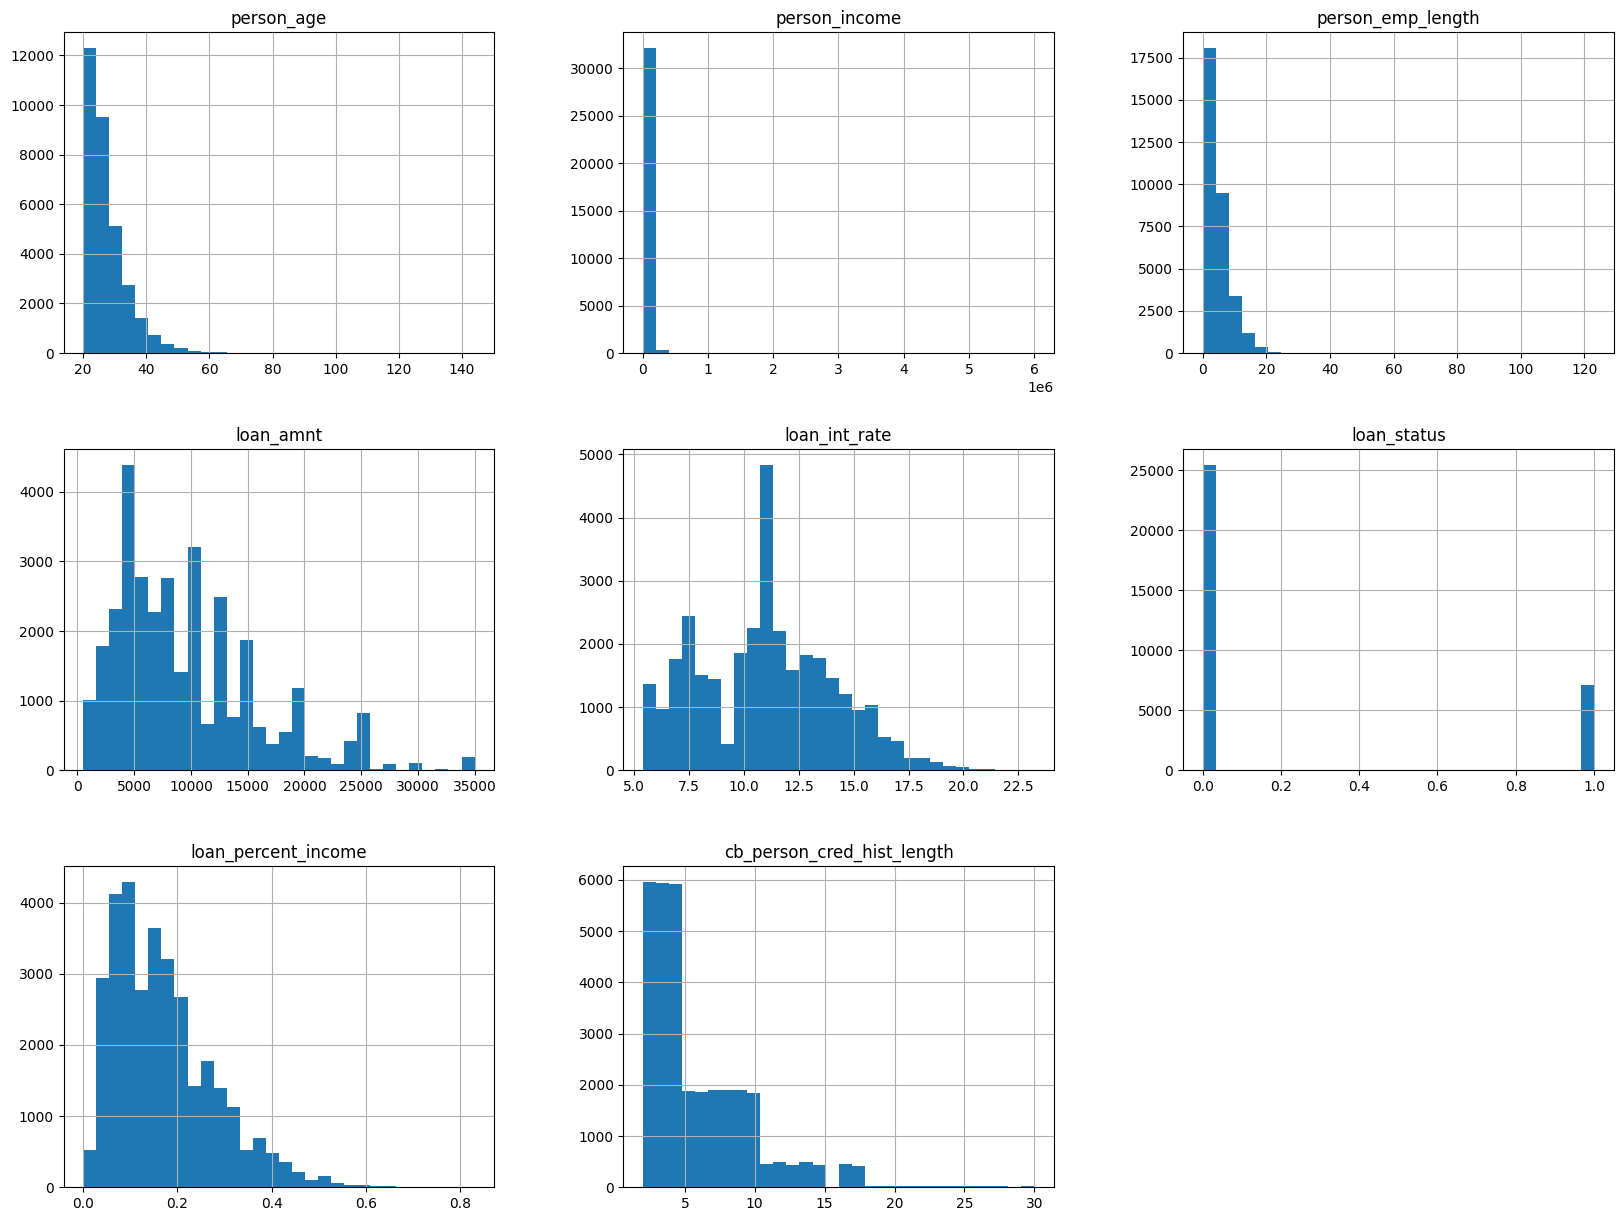

In [25]:
# plot histograms for numerical columns
ax = df[numerical_cols].hist(bins=30, figsize=(20, 15))

Distribution of categorical columns

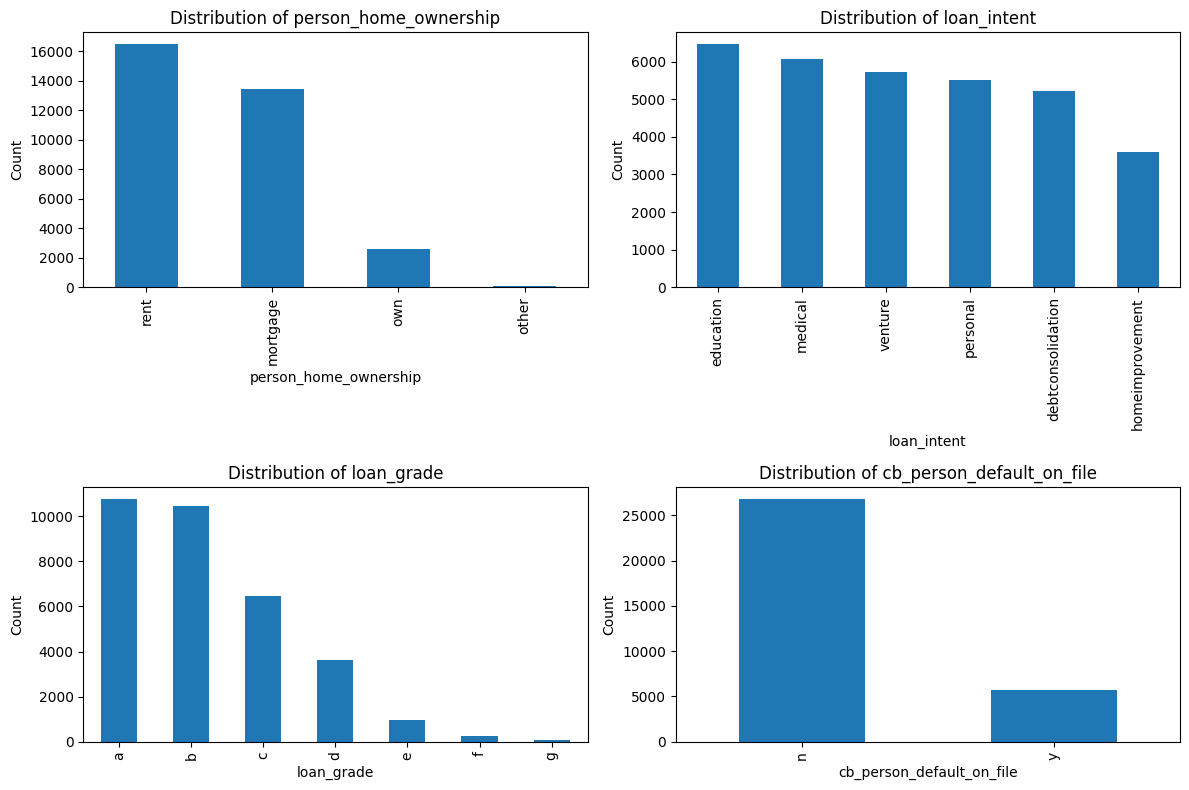

In [26]:
n = len(categorical_cols)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# remove unused subplots
for j in range(i + 1, axes.size):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
for col in categorical_cols:
    print(df[col].value_counts(normalize=True))
    print('')

person_home_ownership
rent        0.504773
mortgage    0.412633
own         0.079310
other       0.003284
Name: proportion, dtype: float64

loan_intent
education            0.198060
medical              0.186336
venture              0.175532
personal             0.169455
debtconsolidation    0.159971
homeimprovement      0.110647
Name: proportion, dtype: float64

loan_grade
a    0.330776
b    0.320770
c    0.198214
d    0.111292
e    0.029588
f    0.007397
g    0.001964
Name: proportion, dtype: float64

cb_person_default_on_file
n    0.82367
y    0.17633
Name: proportion, dtype: float64



Target distribution

In [28]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [29]:
# calculate all categorical columns compare to target column
for col in categorical_cols:
    if col == 'loan_status':
        continue
    ct = pd.crosstab(df[col], df['loan_status'], normalize='index')
    print(ct)
    print('')

loan_status                   0         1
person_home_ownership                    
mortgage               0.874293  0.125707
other                  0.691589  0.308411
own                    0.925310  0.074690
rent                   0.684300  0.315700

loan_status               0         1
loan_intent                          
debtconsolidation  0.714121  0.285879
education          0.827832  0.172168
homeimprovement    0.738974  0.261026
medical            0.732993  0.267007
personal           0.801123  0.198877
venture            0.851897  0.148103

loan_status         0         1
loan_grade                     
a            0.900436  0.099564
b            0.837240  0.162760
c            0.792660  0.207340
d            0.409542  0.590458
e            0.355809  0.644191
f            0.294606  0.705394
g            0.015625  0.984375

loan_status                       0         1
cb_person_default_on_file                    
n                          0.816068  0.183932
y              

Distribution categorical columns and target

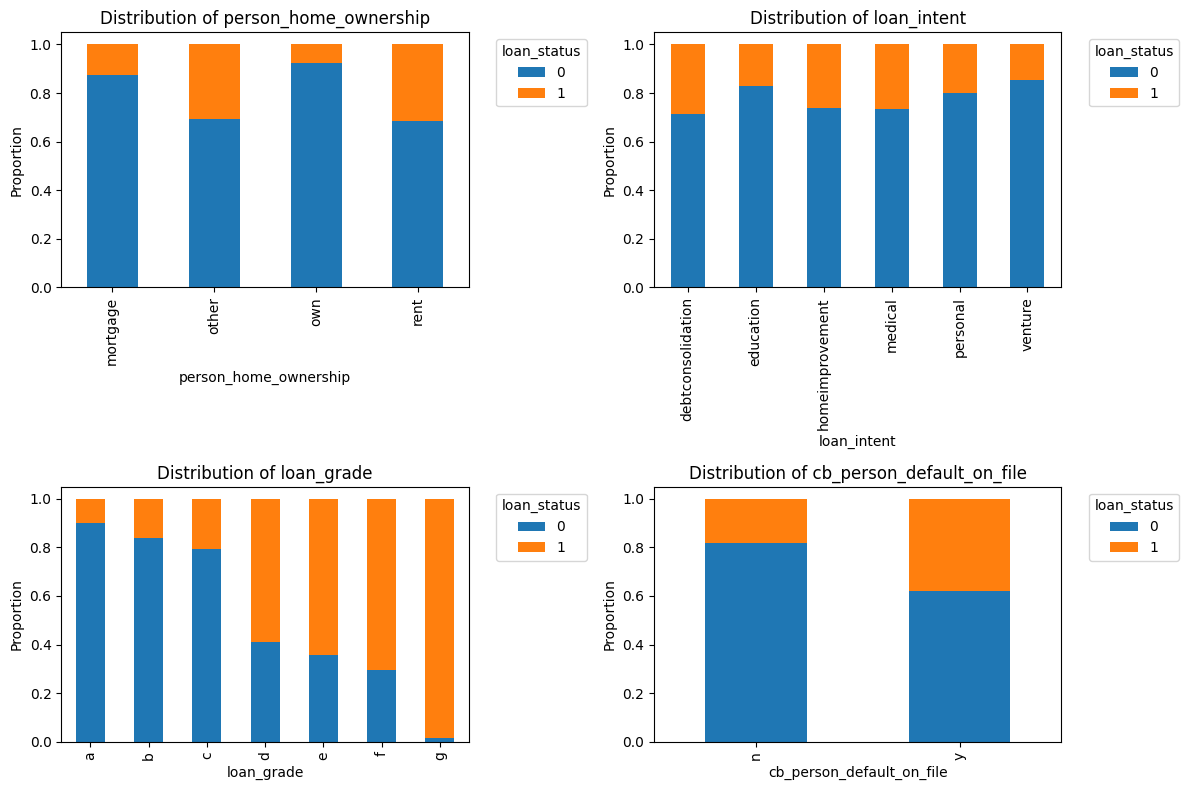

In [30]:
n = len(categorical_cols)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    ct = pd.crosstab(df[col], df['loan_status'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=ax, legend=False)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    ax.legend(title='loan_status')
    ax.legend(title='loan_status', bbox_to_anchor=(1.05, 1), loc='upper left')


# remove unused subplots
for j in range(i + 1, axes.size):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [31]:
# compare numerical columns to target column

df_num_vs_target = df.groupby('loan_status')[numerical_cols].mean().T
df_num_vs_target['diff'] = df_num_vs_target[1] - df_num_vs_target[0]

df_num_vs_target.sort_values(by='diff', ascending=False)

loan_status,0,1,diff
loan_amnt,9237.464178,10850.502954,1613.038777
loan_int_rate,10.489761,12.872642,2.382881
loan_status,0.000000,1.000000,1.000000
loan_percent_income,0.148805,0.246889,0.098084
cb_person_cred_hist_length,5.837475,5.685003,-0.152472
person_age,27.807129,27.474676,-0.332453
person_emp_length,4.945432,4.132105,-0.813328
person_income,70804.361559,49125.652223,-21678.709336


Check skewness

In [32]:
df[numerical_cols].skew().sort_values(ascending=False)

person_income                 32.865349
person_emp_length              2.662878
person_age                     2.581393
cb_person_cred_hist_length     1.661790
loan_status                    1.364888
loan_amnt                      1.192477
loan_percent_income            1.064669
loan_int_rate                  0.221318
dtype: float64

Correlation

In [33]:
# calculate correlation for numerical columns
corr = df[numerical_cols].corr()

corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.161454,0.050787,0.011853,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.135164,0.266820,0.000746,-0.144449,-0.254471,0.117987
person_emp_length,0.161454,0.135164,1.000000,0.113851,-0.051262,-0.082182,-0.054134,0.143069
loan_amnt,0.050787,0.266820,0.113851,1.000000,0.139483,0.105376,0.572612,0.041967
loan_int_rate,0.011853,0.000746,-0.051262,0.139483,1.000000,0.319360,0.114514,0.015762
loan_status,-0.021629,-0.144449,-0.082182,0.105376,0.319360,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054134,0.572612,0.114514,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.143069,0.041967,0.015762,-0.015529,-0.031690,1.000000


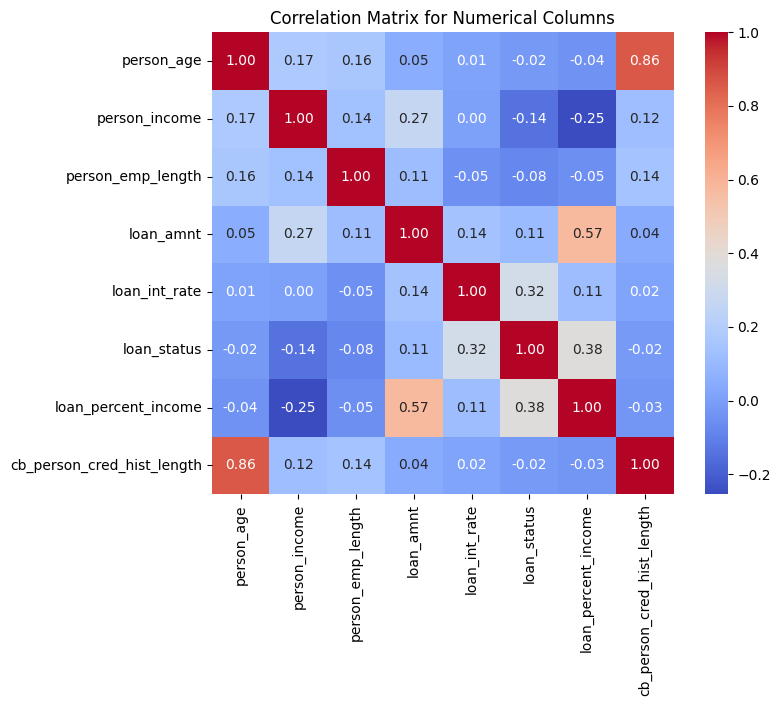

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [35]:
# calculate correlation for numerical columns with target column
corr = df[numerical_cols].corrwith(df['loan_status']).sort_values(ascending=False)

corr

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.319360
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082182
person_income                -0.144449
dtype: float64

Mutual info

In [36]:
# calculate mutual information
mi_scores = {}
for col in categorical_cols:
    mi = mutual_info_score(df[col], df['loan_status'])

    mi_scores[col] = mi
    print(f'{col}: {mi}')

person_home_ownership: 0.030676807201664352
loan_intent: 0.008075832781448189
loan_grade: 0.07448684967603912
cb_person_default_on_file: 0.014507338818275789


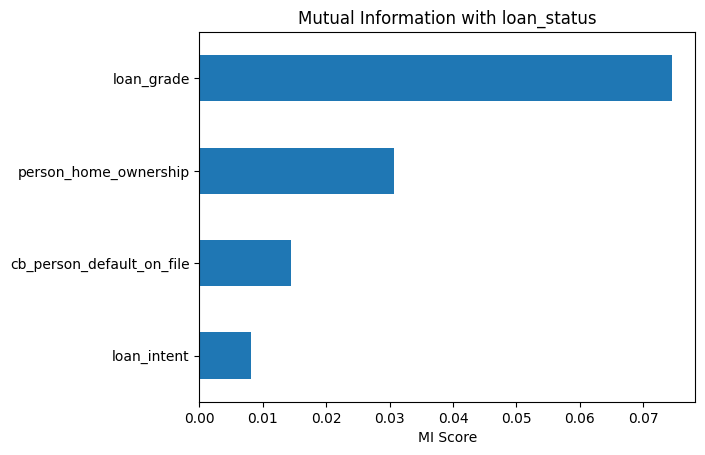

In [37]:
pd.Series(mi_scores).sort_values().plot.barh(title='Mutual Information with loan_status')
plt.xlabel('MI Score')
plt.show()